<a href="https://colab.research.google.com/github/RaquazaCode/gemini_2.5-Pro_video-comprehension-and-YouTube-analysis/blob/main/gemini_2.5-Pro_youtube_transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Gemini 2.5 Pro for YouTube Understanding & Transcription


- **Gemini Docs:** [https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube)


In [ ]:
!pip -q install google-genai jinja2

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_AI_STUDIO')

In [ ]:
import os
from google import genai
from google.genai import types

# create client
client = genai.Client(api_key=GOOGLE_API_KEY)

## YouTube Example


In [ ]:
from google.genai import types

youtube_url = "https://www.youtube.com/watch?v=LMhe2egLsrQ"

prompt = """Analyze the following YouTube video content. Provide a concise summary covering:

1.  **Main Thesis/Claim:** What is the central point the creator is making?
2.  **Key Topics:** List the main subjects discussed, referencing specific examples or technologies mentioned (e.g., AI models, programming languages, projects).
3.  **Call to Action:** Identify any explicit requests made to the viewer.
4.  **Summary:** Provide a concise summary of the video content.

Use the provided title, chapter timestamps/descriptions, and description text for your analysis."""

# Analyze the video
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=types.Content(
        parts=[
            types.Part(text=prompt),
            types.Part(
                file_data=types.FileData(file_uri=youtube_url)
            )
        ]
    )
)

print(response.text)

Here is an analysis of the YouTube video content:

1.  **Main Thesis/Claim:** Google's Gemini 2.5 Pro model significantly advances AI capabilities for audio processing tasks like transcription, speaker diarization, and summarization, primarily due to its large output token capacity (64k tokens) and inherent multimodal understanding, making complex audio analysis more practical and powerful than previous models.

2.  **Key Topics:**
    *   **Gemini 2.5 Pro AI Model:** Focus on its features for audio, especially the 64,000 output token limit enabling transcription of ~2 hours of audio. Comparison to older Gemini models (e.g., 1.5 Pro) and other models like Whisper.
    *   **Audio Processing Tasks:**
        *   **Transcription:** Generating text from audio.
        *   **Speaker Diarization:** Identifying different speakers in the audio and labeling the transcript accordingly (often inferring names if mentioned).
        *   **Summarization:** Creating concise summaries (e.g., bullet p

In [ ]:
from IPython.display import Markdown, display

display(Markdown(response.text))

Here is an analysis of the YouTube video content:

1.  **Main Thesis/Claim:** Google's Gemini 2.5 Pro model significantly advances AI capabilities for audio processing tasks like transcription, speaker diarization, and summarization, primarily due to its large output token capacity (64k tokens) and inherent multimodal understanding, making complex audio analysis more practical and powerful than previous models.

2.  **Key Topics:**
    *   **Gemini 2.5 Pro AI Model:** Focus on its features for audio, especially the 64,000 output token limit enabling transcription of ~2 hours of audio. Comparison to older Gemini models (e.g., 1.5 Pro) and other models like Whisper.
    *   **Audio Processing Tasks:**
        *   **Transcription:** Generating text from audio.
        *   **Speaker Diarization:** Identifying different speakers in the audio and labeling the transcript accordingly (often inferring names if mentioned).
        *   **Summarization:** Creating concise summaries (e.g., bullet points with timestamps) from audio transcripts.
        *   **Question Answering (Q&A):** Interacting with audio content directly or via its transcript.
    *   **Technical Details:** Audio-to-token conversion rates (input/output), pricing considerations (input token limits >200k), supported audio formats (MP3, WAV, FLAC etc.), audio downsampling, stereo-to-mono conversion.
    *   **API & Code Implementation (Python):** Using the `google-genai` library, Google AI Studio, File API for uploading audio (`client.files.upload`), generating content (`client.models.generate_content`), prompt engineering techniques (using Jinja2 templates, specifying format, timestamps, speaker handling), and post-processing transcripts (Python code example provided).
    *   **Use Cases:** Summarizing podcasts (example: "My First Million" downloaded via Podbay.fm), finding specific information/quotes in audio.

3.  **Call to Action:**
    *   Explicitly asks viewers to "click like and subscribe" at the end of the video (15:58).
    *   Implicitly encourages viewers to experiment with Gemini 2.5 Pro for their own audio processing needs using the demonstrated techniques and code.

4.  **Summary:**
    This video explores the enhanced audio processing capabilities of Google's Gemini 2.5 Pro AI model. The creator highlights its large 64k output token limit as a key advantage, allowing for direct transcription of approximately two hours of audio, including speaker diarization. The video demonstrates practical application using Python and the Gemini API, covering audio file uploads, prompt engineering for structured transcripts (with speakers and timestamps), and post-processing for readability. It also showcases creating timestamped summaries from the transcript. The creator argues that Gemini 2.5 Pro represents a significant improvement for tasks like podcast summarization and audio analysis compared to previous models.

In [ ]:
from jinja2 import Template

# Generate a structured response using the Gemini API
prompt_template = Template("""Generate a transcript of the video. Include timestamps and identify speakers.

Speakers are:
{% for speaker in speakers %}- {{ speaker }}{% if not loop.last %}\n{% endif %}{% endfor %}

eg:
[00:00] Brady: Hello there.
[00:02] Tim: Hi Brady.

It is important to include the correct speaker names. Use the names you identified earlier. If you really don't know the speaker's name, identify them with a letter of the alphabet, eg there may be an unknown speaker 'A' and another unknown speaker 'B'.

If there is music or a short jingle playing, signify like so:
[01:02] [MUSIC] or [01:02] [JINGLE]

If you can identify the name of the music or jingle playing then use that instead, eg:
[01:02] [Firework by Katy Perry] or [01:02] [The Sofa Shop jingle]

If there is some other sound playing try to identify the sound, eg:
[01:02] [Bell ringing]

Each individual caption should be quite short, a few short sentences at most.

Signify the end of the episode with [END].

Don't use any markdown formatting, like bolding or italics.

Only use characters from the English alphabet, unless you genuinely believe foreign characters are correct.

It is important that you use the correct words and spell everything correctly. Use the context of the podcast to help.
If the hosts discuss something like a movie, book or celebrity, make sure the movie, book, or celebrity name is spelled correctly.""")

# Define the speakers and render the prompt
speakers = ["Sam"]
prompt = prompt_template.render(speakers=speakers)

In [ ]:
# Analyze the video
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=types.Content(
        parts=[
            types.Part(text=prompt),
            types.Part(
                file_data=types.FileData(file_uri=youtube_url)
            )
        ]
    )
)

print(response.text)

[00:00] Sam: Okay, so in this video, I want to talk about using the Gemini models, in particular the new Gemini 2.5
[00:08] Sam: for doing things with audio. So basically getting transcripts out, getting diarization,
[00:14] Sam: being able to do question and answering over audio, etc.
[00:19] Sam: And this is a technique that I'm finding myself using more and more, whether I want to summarize a podcast that I don't have time to listen to,
[00:28] Sam: right through to automated sort of questioning over audio at scale to be able to find quotes and key information, etc.
[00:36] Sam: So how does Gemini 2.5 change the game in this way?
[00:40] Sam: At the start, it really wasn't something that Google or DeepMind really posted about. If you come through and look at the
[00:46] Sam: initial blog post here, they barely mention audio at all.
[00:50] Sam: They just mentioned that this is a high quality multimodal model.
[00:53] Sam: And we know that the Gemini models have been multimodal from 

In [ ]:
import re

def mmss_to_seconds(time_str):
  """Converts a time string in MM:SS format to the number of seconds.

  Args:
    time_str: The time string in MM:SS format.

  Returns:
    The number of seconds represented by the time string, or None if the input is invalid.
  """
  try:
    minutes, seconds = map(int, time_str.split(':'))
    if minutes < 0 or seconds < 0 or seconds >= 60:
      return None  # Handle invalid input
    return minutes * 60 + seconds
  except ValueError:
    return None  # Handle invalid input format


def get_youtube_video_id(url):
    pattern = r'(?:https?://)?(?:www\.)?(?:youtube\.com/(?:watch\?v=|embed/|v/)|youtu\.be/)([a-zA-Z0-9_-]{11})'
    match = re.search(pattern, url)
    return match.group(1) if match else None


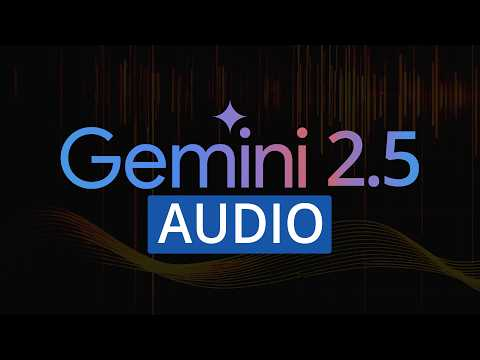

In [ ]:
from IPython.display import YouTubeVideo

time_str = "14:23"


youtube_id = "https://www.youtube.com/watch?v=LMhe2egLsrQ"

video_id = get_youtube_video_id(youtube_id)
start_time_seconds = mmss_to_seconds(time_str)

YouTubeVideo(video_id, width=640, height=360, start=start_time_seconds)


In [ ]:

youtube_url = "https://www.youtube.com/watch?v=LMhe2egLsrQ"

prompt = """Analyze the following YouTube video content. Please extract:

1.  Code in that is shown in Colab/Jupyter notebook not in documentation

return the code in the format ```code```
"""

# Analyze the video
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=types.Content(
        parts=[
            types.Part(text=prompt),
            types.Part(
                file_data=types.FileData(file_uri=youtube_url)
            )
        ]
    )
)

print(response.text)

```python
!pip -q install google-genai jinja2
```

```python
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_AI_STUDIO')
```

```python
import os
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)
```

```python
from jinja2 import Template
# Generate a structured response using the Gemini API
prompt_template = Template("""\"\"\"Generate a transcript of the episode. Include timestamps and identify speakers.

Speakers are:
{% for speaker in speakers %}- {{ speaker }}{% if not loop.last %}\n{% endif %}{% endfor %}

eg:
[00:00] Brady: Hello there.
[00:02] Tim: Hi Brady.

It is important to include the correct speaker names. Use the names you identified earlier. If there is music or a short jingle playing, signify like so:
[01:02] [MUSIC] or [01:02] [JINGLE]

If you can identify the name of the music or jingle playing then use that instead, eg:
[01:02] [Firework by Katy Perry] or [01:02] [The Sofa Shop jingle]

If the

In [ ]:
display(Markdown(response.text))

```python
!pip -q install google-genai jinja2
```

```python
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_AI_STUDIO')
```

```python
import os
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)
```

```python
from jinja2 import Template
# Generate a structured response using the Gemini API
prompt_template = Template("""\"\"\"Generate a transcript of the episode. Include timestamps and identify speakers.

Speakers are:
{% for speaker in speakers %}- {{ speaker }}{% if not loop.last %}\n{% endif %}{% endfor %}

eg:
[00:00] Brady: Hello there.
[00:02] Tim: Hi Brady.

It is important to include the correct speaker names. Use the names you identified earlier. If there is music or a short jingle playing, signify like so:
[01:02] [MUSIC] or [01:02] [JINGLE]

If you can identify the name of the music or jingle playing then use that instead, eg:
[01:02] [Firework by Katy Perry] or [01:02] [The Sofa Shop jingle]

If there is some other sound playing try to identify the sound, eg:
[01:02] [Bell ringing]

Each individual caption should be quite short, a few short sentences at most.

Signify the end of the episode with [END].

Don't use any markdown formatting, like bolding or italics.

Only use characters from the English alphabet, unless you genuinely believe foreign characters are essential (e.g. names, places).
It is important that you use the correct words and spell everything correctly. Use the correct punctuation.
If the hosts discuss something like a movie, book or celebrity, make sure the movie, book or celebrity name is correct.
\"\"\"""")

# Define the speakers and render the prompt
speakers = ["John"]
prompt = prompt_template.render(speakers=speakers)
print(prompt)

```

```python
# path to the file to upload
file_path = "/content/HS4830417304.mp3"

# Upload the file to the File API
uploaded_file = client.files.upload(file=file_path)

file_name = uploaded_file.name
print(file_name)

myfile = client.files.get(name=file_name)
print(myfile)
```

```python
response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=[prompt, uploaded_file],
)

print(response.text)
```

```python
import re
import datetime

def timestamp_to_seconds(ts_str):
    """Converts an HH:MM:SS or MM:SS timestamp string to total seconds."""
    # Args:
    #   ts_str (str): Timestamp string in HH:MM:SS or MM:SS format.
    # Returns:
    #   int or None: Total seconds from midnight, or None if parsing fails.
    try:
        # Remove milliseconds if present
        ts_str = ts_str.split('.')[0]
        # Split timestamp into parts
        parts = list(map(int, ts_str.split(':')))

        if len(parts) == 3: # HH:MM:SS format
            h, m, s = parts
            return h * 3600 + m * 60 + s
        elif len(parts) == 2: # MM:SS format
            m, s = parts
            return m * 60 + s
        else:
            # Invalid number of parts
            return None
    except (ValueError, AttributeError, IndexError):
        # Return None if parsing fails for any reason
        return None

def seconds_to_timestamp(total_seconds):
    """
    Converts total seconds to an HH:MM:SS timestamp string.
    (No changes needed here, always outputs full format)

    Args:
      total_seconds (int): Total seconds from midnight.

    Returns:
      str: Timestamp string in HH:MM:SS format.
    """
    if total_seconds is None or total_seconds < 0:
        total_seconds = 0 # Default to 0 if input is invalid or negative
    # Calculate hours, minutes, and seconds
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    # Format as HH:MM:SS with leading zeros
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

def process_transcript(input_text, max_segment_duration=30):
    """
    Processes transcript text to join lines based on speaker and time.

    Joins consecutive lines if the speaker is the same AND the time elapsed
    since the start of the current segment is within max_segment_duration.
    Starts a new segment if the speaker changes OR the time limit is exceeded.
    Includes non-dialogue lines (like [MUSIC]) as separate lines.

    Args:
      input_text (str): The raw transcript text (multiline string).
      max_segment_duration (int): Maximum duration in seconds for a single
                                 speaker's segment before forcing a new
                                 timestamp. Defaults to 30.

    Returns:
      str: The processed transcript text as a multiline string.
    """
    # Use splitlines() for more robust handling of different newline characters
    lines = input_text.strip().splitlines()
    output_lines = [] # List to store the processed output lines

    # Variables to keep track of the current segment being built
    current_segment_start_ts_str = None # Timestamp string of the segment start
    current_segment_start_seconds = None # Timestamp in seconds of the segment start
    current_speaker = None # Speaker of the current segment
    current_text_parts = [] # List of text pieces in the current segment

    # --- UPDATED Regex ---
    # Capture timestamp [HH:MM:SS] or [MM:SS], speaker, and text content.
    # Made the HH: part optional using (?:...)?
    line_regex = re.compile(r'\[((?:\d{2}:)?\d{2}:\d{2}(?:\.\d+)?)]\s*([^:]+):\s*(.*)')


    for i, line in enumerate(lines):
        line = line.strip() # Remove leading/trailing whitespace
        if not line:
            continue # Skip empty lines

        match = line_regex.match(line)

        # --- Debugging Prints (Keep commented unless needed) ---
        # print(f'\nProcessing Line {i+1}: {line}')
        # if match:
        #     _ts, _spk, _txt = match.groups()
        #     _sec = timestamp_to_seconds(_ts)
        #     print(f'  Parsed: ts={_ts}, speaker={_spk.strip()}, text=\'{_txt.strip()}\'')
        #     print(f'  Current Segment State: speaker=\'{current_speaker}\', start_ts=\'{current_segment_start_ts_str}\', start_sec={current_segment_start_seconds}')
        # else:
        #     print(f'  No Match: Treating as non-dialogue.')
        #     print(f'  Current Segment State: speaker=\'{current_speaker}\', start_ts=\'{current_segment_start_ts_str}\', start_sec={current_segment_start_seconds}')
        # --- End Debugging Prints ---

        if not match:
            # Handle non-standard lines ---
            if current_speaker is not None:
                segment_text = ' '.join(filter(None, current_text_parts))
                # print(f"  Finalizing previous (due to non-match): [{current_segment_start_ts_str}] {current_speaker}: {segment_text}") # DEBUG
                output_lines.append(f"[{current_segment_start_ts_str}] {current_speaker}: {segment_text}")
                current_speaker = None
                current_text_parts = []
                current_segment_start_ts_str = None
                current_segment_start_seconds = None
            # print(f"  Adding non-dialogue line: {line}") # DEBUG
            output_lines.append(line)
            continue

        # --- Process standard dialogue lines ---
        ts_str, speaker, text = match.groups()
        speaker = speaker.strip()
        text = text.strip()
        # Use the updated function to parse timestamp
        current_seconds = timestamp_to_seconds(ts_str)

        if current_seconds is None:
            print(f"Warning: Skipping line {i+1} due to invalid timestamp format: {line}")
            continue

        # --- Logic to decide whether to start a new segment ---
        start_new_segment = False
        if current_speaker is None: # First line of a new speaker
             start_new_segment = True
        elif speaker != current_speaker: # Speaker changed
             start_new_segment = True
        elif current_seconds - current_segment_start_seconds > max_segment_duration: # Time limit exceeded
             start_new_segment = True

        if start_new_segment:
            # Finalize the previous segment if it exists
            if current_speaker is not None:
                segment_text = ' '.join(filter(None, current_text_parts))
                # print(f"  Finalizing previous: [{current_segment_start_ts_str}] {current_speaker}: {segment_text}") # DEBUG
                output_lines.append(f"[{current_segment_start_ts_str}] {current_speaker}: {segment_text}")

            # Start the new segment
            # print(f"  Starting new segment: speaker='{speaker}', ts='{ts_str}', sec={current_seconds}") # DEBUG
            current_segment_start_ts_str = seconds_to_timestamp(current_seconds) # Use formatted timestamp
            current_segment_start_seconds = current_seconds
            current_speaker = speaker
            current_text_parts = [text]
        else:
            # Append text to the current segment
            # print(f"  Appending to current segment: '{text}'") # DEBUG
            current_text_parts.append(text)

    # Finalize the last segment after the loop
    if current_speaker is not None:
        segment_text = ' '.join(filter(None, current_text_parts))
        # print(f"Finalizing last segment: [{current_segment_start_ts_str}] {current_speaker}: {segment_text}") # DEBUG
        output_lines.append(f"[{current_segment_start_ts_str}] {current_speaker}: {segment_text}")

    return "\n".join(output_lines)

```

```python
processed_transcript = process_transcript(response.text, max_segment_duration=30)
print(processed_transcript)
```

```python
PROMPT = """\"\"\"Make me a set of notes in the form of bullet points \
(with time stamps at end of each idea (in the form HH:MM:SS)) to summarize this podcast \
The bullets should be based on the idea and don't need to be sequential.
Structure the ideas with a heading and subheadings. Don't include any prefix. here is transcript below:
"""

response = client.models.generate_content(
    model="gemini-2.5-pro-exp-03-25",
    contents=[PROMPT + processed_transcript],
)

print(response.text)
```

```python
import IPython.display as ipd
ipd.Audio("/content/HS4830417304.mp3", autoplay=True)

```